In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

c:\Users\user\Desktop\Python_Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

In [3]:
#cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #convert to datetime
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #skills column is a strings of list. so converting to a list 
#df_DA_USA_exploded = df_DA_USA.explode('job_skills')  #exploding the skills column to see better each skills

In [5]:
df_USA = df[df['job_country'] == 'United States'].copy()
df_USA = df_USA.dropna(subset= ['salary_year_avg'])

In [12]:
job_titles = df_USA['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [16]:
df_US_top_6 = df_USA[df_USA['job_title_short'].isin(job_titles)]

In [28]:
df_median = df_US_top_6[['job_title_short', 'salary_year_avg']]
df_median= df_median.groupby(by='job_title_short').median().sort_values(by= 'salary_year_avg',ascending= False).index
df_median


Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

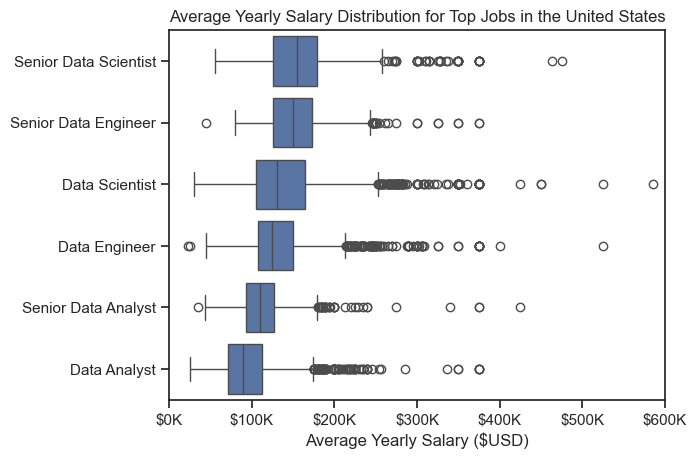

In [34]:
sns.boxplot(data= df_US_top_6, x='salary_year_avg', y='job_title_short', order= df_median)

plt.title('Average Yearly Salary Distribution for Top Jobs in the United States')
plt.xlabel('Average Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()

Investigate Median Salary vs Skill for Data Analyst

In [37]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])
df_DA_USA = df_DA_USA.explode('job_skills')

In [44]:
df_DA_top_pay = df_DA_USA['salary_year_avg'].groupby(df_DA_USA['job_skills']).agg(['count', 'median']).sort_values(by='median', ascending= False)
df_DA_top_pay =df_DA_top_pay.head(10)

In [60]:
df_DA_popular_skill = df_DA_USA['salary_year_avg'].groupby(df_DA_USA['job_skills']).agg(['count', 'median']).sort_values(by='count', ascending= False)
df_DA_popular_skill = df_DA_popular_skill.head(10).sort_values(by='median', ascending= False)
df_DA_popular_skill

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


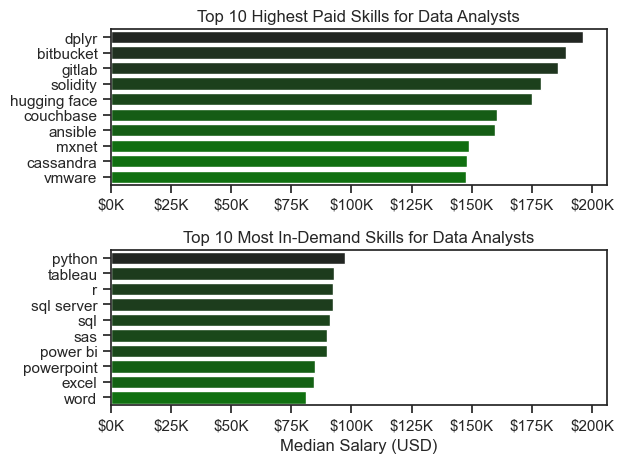

In [61]:
fig, ax = plt.subplots(2, 1)  

#Highest paid skills (top 10)
sns.barplot(data= df_DA_top_pay, x= 'median', y= df_DA_top_pay.index, ax=ax[0], hue= 'median', palette=  'dark:green_r', legend= False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#most in-demand skills (top 10)
sns.barplot(data= df_DA_popular_skill, x= 'median', y= df_DA_popular_skill.index, ax=ax[1], hue= 'median', palette= 'dark:green_r', legend= False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()